# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Capstone - Build a Traffic Sign' color Recognition Classifier

Basic CNN in order to classify color in traffic sign.
Input: Folder with 32x32 color images, and labels: 0-RED, 1-YELLOW, 2-GREEN, 3-UNKOWN
Output: CNN is trained and saved.

TODO:
1. To train again, because it has been trained withh 57 samples (it needs a lot more data).
2. To embed saved model into RealSDC ros workspace.


---
## Step 0: Load The Data

In [102]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import os
import matplotlib.pyplot as plt
import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

In [103]:
# Normalizing data
def normalize_data(data, new_min, new_max):
    x_max = np.amax(data)
    x_min = np.amin(data)
    data_normalized = new_min + ( ((data - x_min) * (new_max - new_min)) / (x_max - x_min) )
    return data_normalized

In [104]:
RUN_MODE = 'simulator' # simulator / real
IMAGE_FOLDER_SIMULATOR = './Test_Images/santi_simulator_imgs'
IMAGE_FOLDER_REAL = './Test_Images/santi_real_imgs'
IMAGE_HEIGHT = 32
IMAGE_WIDTH = 32
IMAGE_CHANNELS = 3
IMAGE_EXT = '.jpg' # .png, .jpg
TEST_SIZE_PCT = 0.15
VALID_SIZE_PCT = 0.20

def load_images_from_folder_capstone(folder_name):
    X_train = np.empty((0,IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS))
    X_test  = np.empty((0,IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS))
    X_valid = np.empty((0,IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS))
    y_train = np.array([], dtype=int)
    y_test  = np.array([], dtype=int)
    y_valid = np.array([], dtype=int)
    
    for item in range(4):
        img_names=[]
        images=[]
        img_labels=[]        
        files = glob.glob(folder_name+"/"+str(item)+"/*"+IMAGE_EXT)
        for f in files:
            img = cv2.imread(f)
            if img is not None:
                # print("Processing: "+f)
                #img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, dsize=(IMAGE_WIDTH,IMAGE_HEIGHT))
                images.append(img)
                img_names.append(f)
                img_labels.append(item)
        tot_samples = len(img_labels)
        
        images_np = np.array(images)
        img_labels_np = np.array(img_labels, dtype=int)
        
        # Process data
        #print(images_np.shape)
        #print(images_np.dtype)
        images_norm = normalize_data(images_np, -0.5, 0.5)
        #print(images_norm.dtype)
        # Shuffle data
        X_data, y_data = shuffle(images_norm, img_labels)
        # Split train and obtain validation set
        X_tr, X_te, y_tr, y_te = train_test_split(X_data, y_data, test_size=TEST_SIZE_PCT)
        # print("Train dataset: "+str(X_tr.shape[0])+" samples, Test dataset: "+str(X_te.shape[0])+" samples.")
        X_tr, X_va, y_tr, y_va = train_test_split(X_tr, y_tr, test_size=VALID_SIZE_PCT)
        # print("Train dataset: "+str(X_tr.shape[0])+" samples, Validation dataset: "+str(X_va.shape[0])+" samples.")
        
        X_train = np.append(X_train, X_tr, axis=0)
        X_valid = np.append(X_valid, X_va, axis=0)
        X_test = np.append(X_test  , X_te, axis=0)
        y_train = np.append(y_train, y_tr, axis=0)
        y_test  = np.append(y_test , y_te, axis=0)
        y_valid = np.append(y_valid, y_va, axis=0)
        
    #print("Train dataset: "+str(X_train.shape[0])+" samples, "+str(y_train.shape[0])+" labels.")
    #print("Test  dataset: "+str(X_test.shape[0])+" samples, "+str(y_test.shape[0])+" labels.")
    #print("Validation dataset: "+str(X_valid.shape[0])+" samples, "+str(y_valid.shape[0])+" labels.")
    return X_train, X_valid, X_test, y_train, y_valid, y_test



In [105]:
if (RUN_MODE == 'simulator'):
    target_folder = IMAGE_FOLDER_SIMULATOR
else:
    target_folder = IMAGE_FOLDER_REAL
X_train, X_valid, X_test, y_train, y_valid, y_test = load_images_from_folder_capstone(target_folder)

print("Train dataset: "+str(X_train.shape[0])+" samples, "+str(y_train.shape[0])+" labels.")
print("Test  dataset: "+str(X_test.shape[0])+" samples, "+str(y_test.shape[0])+" labels.")
print("Validation dataset: "+str(X_valid.shape[0])+" samples, "+str(y_valid.shape[0])+" labels.")

Train dataset: 676 samples, 676 labels.
Test  dataset: 152 samples, 152 labels.
Validation dataset: 172 samples, 172 labels.


---

## Step 1: Dataset Summary & Exploration



In [106]:
import numpy as np
print(X_train.shape)
# Number of training examples
n_train = X_train.shape[0]
print("Number of training examples =", n_train)
# Number of testing examples.
n_test = X_test.shape[0]
print("Number of testing examples =", n_test)
# What's the shape of an traffic sign image?
image_shape = tuple([X_train.shape[1], X_train.shape[2], X_train.shape[3]])
print("Image data shape =", image_shape)
# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))
print("Number of classes =", n_classes)

xxx = X_test[0,:,:,:]
print(X_test.shape)
print(xxx.shape)
new_xxx = np.empty((1,32,32,3))
new_xxx[0,:,:,:] = xxx[:,:,:]
print(new_xxx.shape)


(676, 32, 32, 3)
('Number of training examples =', 676)
('Number of testing examples =', 152)
('Image data shape =', (32, 32, 3))
('Number of classes =', 4)
(152, 32, 32, 3)
(32, 32, 3)
(1, 32, 32, 3)


[352, 127, 207]
352
Class Id is: 2
Class name is: GREEN


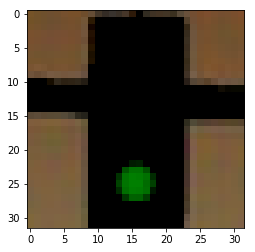

127
Class Id is: 0
Class name is: RED


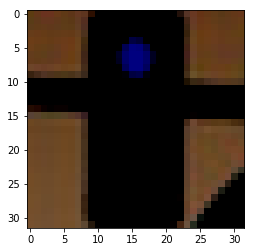

207
Class Id is: 1
Class name is: YELLOW


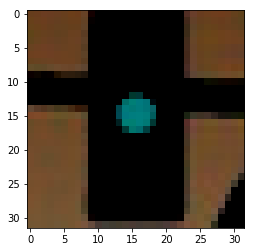

In [107]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
random_pos = random.sample(range(1,n_train),3)
print(random_pos)


# Finding Class name into CSV file
import pandas as pd

df = pd.read_csv('colornames.csv',delimiter=',')
#print(df.columns)
dict_names = dict(zip(list(df['ClassId']),list(df['ColorName'])))

# Visualizing a random images
for i in random_pos:
    print(i)
    print("Class Id is: {}".format(y_train[i]))
    print("Class name is: {}".format(dict_names[y_train[i]]))
    plt.imshow(X_train[i,:,:,:])
    plt.show()


In [108]:
# Data Exploration
print("Showing number of samples per Class Id")
print("=======================================")
print("Note: In descending order per number of class.")
panda_series = pd.Series(y_train)
panda_series.value_counts().sort_values(ascending=True)

Showing number of samples per Class Id
Note: In descending order per number of class.


3    169
2    169
1    169
0    169
dtype: int64

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs color.

### Implementation



In [109]:
# Displaying RAW image data
import numpy as np
x_max = np.amax(X_train)
x_min = np.amin(X_train)
print("Max value in X_train: {}".format(x_max))
print("Min value in X_train: {}".format(x_min))
lab_unique = np.unique(y_train)
print("Values on y_train are: {}".format(lab_unique))
print("Number of classes on y_train: {}".format(len(lab_unique)))

Max value in X_train: 0.5
Min value in X_train: -0.5
Values on y_train are: [0 1 2 3]
Number of classes on y_train: 4


In [110]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
CNN_NET_NAME = 'ColorTrafficSign_Net'
NUMBER_OF_CLASSES = 4

In [111]:
import tensorflow as tf

tf.reset_default_graph()

EPOCHS = 100
BATCH_SIZE = 24 # 128
from tensorflow.contrib.layers import flatten

#print(tf.__version__)

# Store layers weight, bias, strides & ksizes
# weights format: [height, width, input depth, output depth]
# Full cambia de 120 a 150 y 84 a 110

# Hyperparameters
mu = 0
sigma = 0.1
weights = {
    'w_conv1': tf.Variable(tf.truncated_normal(shape=(5, 5, 3,  6), mean = mu, stddev = sigma), name='w_conv1'),
    'w_conv2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name='w_conv2'),
    'w_Full1': tf.Variable(tf.truncated_normal(shape=(5*5*16, 130), mean = mu, stddev = sigma), name='w_Full1'),
    'w_Full2': tf.Variable(tf.truncated_normal(shape=(130, 100), mean = mu, stddev = sigma), name='w_Full2'),
    'w_out': tf.Variable(tf.truncated_normal(shape=(100, NUMBER_OF_CLASSES), mean = mu, stddev = sigma), name='w_out')}

biases = {
    'b_conv1': tf.Variable(tf.zeros(6), name='b_conv1'),
    'b_conv2': tf.Variable(tf.zeros(16), name='b_conv2'),
    'b_Full1': tf.Variable(tf.zeros(130), name='b_Full1'),
    'b_Full2': tf.Variable(tf.zeros(100), name='b_Full2'),
    'b_out': tf.Variable(tf.zeros(NUMBER_OF_CLASSES), name='b_out')}
    
# strides format: [batch, height, width, channels]
strides = {
    's_conv1': [1,1,1,1],
    's_subsamp1': [1,2,2,1],
    's_conv2': [1, 1, 1, 1],
    's_subsamp2': [1,2,2,1]}    
    
# ksize format: [batch, height, width, channels]
ksizes = {
    'k_subsamp1': [1,2,2,1],
    'k_subsamp2': [1,2,2,1]}
    
def TrafficSign_Net(x, weights, biases, strides, ksizes, mu, sigma):    


    network = x
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    network = tf.nn.conv2d(network,weights['w_conv1'],strides=strides['s_conv1'],padding='VALID')
    network = tf.nn.bias_add(network, biases['b_conv1'])
    # TODO: Activation.
    network = tf.nn.relu(network)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    network = tf.nn.max_pool(network, ksize=ksizes['k_subsamp1'], strides=strides['s_subsamp1'],padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    network = tf.nn.conv2d(network,weights['w_conv2'],strides=strides['s_conv2'],padding='VALID')
    network = tf.nn.bias_add(network, biases['b_conv2'])

    # TODO: Activation.
    network = tf.nn.relu(network)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    network = tf.nn.max_pool(network, ksize=ksizes['k_subsamp2'], strides=strides['s_subsamp2'],padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    network = flatten(network)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    network = tf.add(tf.matmul(network,weights['w_Full1']), biases['b_Full1'])
    # TODO: Activation.
    network = tf.nn.relu(network)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    network = tf.add(tf.matmul(network,weights['w_Full2']), biases['b_Full2'])
    # TODO: Activation.
    network = tf.nn.relu(network)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(network,weights['w_out']), biases['b_out'], name='my_logits')
    
    return logits

In [112]:
# Variables for Features and Labels
x = tf.placeholder(tf.float32, (None,IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
one_hot_y = tf.one_hot(y,NUMBER_OF_CLASSES)

In [113]:
# Training Pipeline
rate = 0.0005
logits = TrafficSign_Net(x, weights, biases, strides, ksizes, mu, sigma)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [114]:
# Model Evaluation
# Note: I assign names to some operations because I will save and restore the model in order to run it
# with new data
logits_top2 = tf.nn.top_k(logits, k=2, name='my_logits_top2')
probabilities = tf.nn.softmax(logits, name='my_probabilities')
probabilities_top2 = tf.nn.top_k(probabilities, k=2, name='my_probabilities_top2')
predictions = tf.argmax(logits, 1, name='my_predictions')

# In this specific case, I will not recalculate these operations, so I don't assign names but I could do so
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init_op = tf.global_variables_initializer()

saver = tf.train.Saver()

def evaluate(sess, X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    # sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def predict(sess, X_data):
    # sess = tf.get_default_session()
    logs = sess.run(logits, feed_dict={x: X_data})
    logs_top2 = sess.run(logits_top2, feed_dict={x: X_data})
    probab = sess.run(probabilities, feed_dict={x: X_data})
    probab_top2 = sess.run(probabilities_top2, feed_dict={x: X_data})
    predicts = sess.run(predictions, feed_dict={x: X_data})
    return logs, logs_top2, probab, probab_top2, predicts



### Train the Model



In [115]:
import timeit
start_time = timeit.default_timer()

In [116]:
### Train your model 
sess = tf.Session()
sess.run(init_op)
#sess.run(init_op)

num_examples = len(X_train)
valid_acc = []

print("Training...")
print()
for i in range(EPOCHS):
    X_train, y_train = shuffle(X_train, y_train)
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_train[offset:end], y_train[offset:end]
        sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
    validation_accuracy = evaluate(sess, X_valid, y_valid)
    print("EPOCH {} ...".format(i+1))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    valid_acc.append(validation_accuracy)
    print()
                 
saver.save(sess, CNN_NET_NAME+"_"+RUN_MODE +".ckpt")
print("Model saved")
elapsed_time = timeit.default_timer() - start_time
print("Elapsed Time is: {}".format(elapsed_time))

Training...
()
EPOCH 1 ...
Validation Accuracy = 0.895
()
EPOCH 2 ...
Validation Accuracy = 0.913
()
EPOCH 3 ...
Validation Accuracy = 0.936
()
EPOCH 4 ...
Validation Accuracy = 0.977
()
EPOCH 5 ...
Validation Accuracy = 0.948
()
EPOCH 6 ...
Validation Accuracy = 0.994
()
EPOCH 7 ...
Validation Accuracy = 1.000
()
EPOCH 8 ...
Validation Accuracy = 1.000
()
EPOCH 9 ...
Validation Accuracy = 1.000
()
EPOCH 10 ...
Validation Accuracy = 1.000
()
EPOCH 11 ...
Validation Accuracy = 1.000
()
EPOCH 12 ...
Validation Accuracy = 1.000
()
EPOCH 13 ...
Validation Accuracy = 1.000
()
EPOCH 14 ...
Validation Accuracy = 1.000
()
EPOCH 15 ...
Validation Accuracy = 1.000
()
EPOCH 16 ...
Validation Accuracy = 1.000
()
EPOCH 17 ...
Validation Accuracy = 1.000
()
EPOCH 18 ...
Validation Accuracy = 1.000
()
EPOCH 19 ...
Validation Accuracy = 1.000
()
EPOCH 20 ...
Validation Accuracy = 1.000
()
EPOCH 21 ...
Validation Accuracy = 1.000
()
EPOCH 22 ...
Validation Accuracy = 1.000
()
EPOCH 23 ...
Validation Ac

In [117]:
# Number of samples per class ID (Class ID, number of samples)
print("Class Ids with less number of samples")
print("=====================================")
panda_series = pd.Series(y_train)
panda_series.value_counts().sort_values(ascending=True).head(10)

Class Ids with less number of samples


3    169
2    169
1    169
0    169
dtype: int64

---

## Step 3: Test a Model on New Images



### Implementation



In [118]:
# This function calculate logits, softmax probs, top5 softmax probs, and the prediction.
newImages_logs, newImages_logs_top2, newImages_probs, newImages_probs_top2, newImages_predicts = predict(sess, X_test)

total_newImages = len(y_test)

newImages_correct_predictions = np.sum(np.equal(y_test, newImages_predicts))

newImages_accuracy = 1.0 * newImages_correct_predictions / total_newImages

print("Test Dataset: {} samples.".format(total_newImages))
print("Accuracy on NewImages dataset is: {}".format(newImages_accuracy))

#show predictions vs. true labels
for item in range(total_newImages):
    if y_test[item] == newImages_predicts[item]:
        print("Image: {} - CORRECT.".format(item))
    else:
        print("Image: {} - INCORRECT.".format(item))
    print("=========================================================")
    print("True Value: {}-{}".format(y_test[item],dict_names[y_test[item]]))
    print("Prediction: {}-{}".format(newImages_predicts[item], dict_names[newImages_predicts[item]]))
    print("")

Test Dataset: 152 samples.
Accuracy on NewImages dataset is: 1.0
Image: 0 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 1 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 2 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 3 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 4 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 5 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 6 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 7 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 8 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 9 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 10 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 11 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 12 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 13 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 14 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 15 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 16 - CORRE

---

## Step 3: Restore trained model from disk and test new data


### Restoring trained model from disk

In [119]:
def predict_saved(sess, graph, X_data):

    # Another way to get graph is using sess.graph
    #graph = sess.graph
    
    # Now, let's access and create placeholders variables 
    x_pred = graph.get_tensor_by_name("x:0")
    #y_pred = graph.get_tensor_by_name("y:0")    
    
    #Now, access the operations that you want to run. 
    my_logits             = graph.get_tensor_by_name("my_logits:0")
    my_logits_top2        = graph.get_tensor_by_name('my_logits_top2:0')
    my_probabilities      = graph.get_tensor_by_name('my_probabilities:0')
    my_probabilities_top2 = graph.get_tensor_by_name('my_probabilities_top2:0')
    my_predictions        = graph.get_tensor_by_name('my_predictions:0')

    logs           = sess.run(my_logits, feed_dict={x_pred: X_data})
    logs_top2      = sess.run(my_logits_top2, feed_dict={x_pred: X_data})
    probab         = sess.run(my_probabilities, feed_dict={x_pred: X_data})
    probab_top2    = sess.run(my_probabilities_top2, feed_dict={x_pred: X_data})
    predicts       = sess.run(my_predictions, feed_dict={x_pred: X_data})
    return logs, logs_top2, probab, probab_top2, predicts

In [120]:
CNN_NET_NAME = 'ColorTrafficSign_Net'
RUN_MODE = 'simulator' # simulator / real

def restore_my_model(my_net_name, run_mode):
    # RESET GRAPH 
    # reset any previous variables
    #tf.reset_default_graph()
    
    # Create a new Graph
    my_new_graph = tf.Graph()
    # Create a new session
    my_new_session = tf.Session(graph = my_new_graph)
    
    with my_new_graph.as_default():
        # INITIALIZE VARIABLES (to be overwrite later on when restore happens)
        # Initialize variables that will be used by our operations to be calculated
        # These weights and bias will be overwrite with saved values when saver.restore is executed below.
        # Note: IMPORTANT !!! we have to include variable but we SHOULDN'T include placeholders
        #                   placeholders will be get from get_tensor_by_name and populated with new data (see predict_saved)

        # Useful comments
        # It’s a standard practice to feed all the training data and hyperparameters using placeholders. 
        # Note that when the network is saved, placeholders definitions are saved by values of the placeholders are not saved.

        NUMBER_OF_CLASSES = 4

        # Hyperparameters
        mu = 0
        sigma = 0.1
        w_conv1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 3,  6), mean = mu, stddev = sigma), name='w_conv1'),
        w_conv2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name='w_conv2'),
        w_Full1 = tf.Variable(tf.truncated_normal(shape=(5*5*16, 130), mean = mu, stddev = sigma), name='w_Full1'),
        w_Full2 = tf.Variable(tf.truncated_normal(shape=(130, 100), mean = mu, stddev = sigma), name='w_Full2'),
        w_out   = tf.Variable(tf.truncated_normal(shape=(100, NUMBER_OF_CLASSES), mean = mu, stddev = sigma), name='w_out')

        b_conv1 = tf.Variable(tf.zeros(6), name='b_conv1'),
        b_conv2 = tf.Variable(tf.zeros(16), name='b_conv2'),
        b_Full1 = tf.Variable(tf.zeros(130), name='b_Full1'),
        b_Full2 = tf.Variable(tf.zeros(100), name='b_Full2'),
        b_out   = tf.Variable(tf.zeros(NUMBER_OF_CLASSES), name='b_out')

        # Define an operation in order to initialize our variables
        init_op = tf.global_variables_initializer()

        # It will initialize our variables with random values by now
        my_new_session.run(init_op)

        #First let's load meta graph (actual graph with all operations, but not variables)
        saver_restored = tf.train.import_meta_graph(my_net_name + '_' + run_mode + '.ckpt.meta')

        #Second restore variables (weights are variables as well)
        saver_restored.restore(my_new_session, my_net_name + "_" + run_mode + ".ckpt")

    return my_new_session, my_new_graph


In [121]:
sess_restored, graph_restored = restore_my_model(CNN_NET_NAME, RUN_MODE)

INFO:tensorflow:Restoring parameters from ColorTrafficSign_Net_simulator.ckpt


In [122]:
# Calculate predictions based on restored model
newImages_logs, newImages_logs_top2, newImages_probs, newImages_probs_top2, newImages_predicts = predict_saved(sess_restored, graph_restored, X_test)

total_newImages = len(y_test)

print(type(newImages_predicts.shape[0]))

newImages_correct_predictions = np.sum(np.equal(y_test, newImages_predicts))

newImages_accuracy = 1.0 * newImages_correct_predictions / total_newImages

print("Test Dataset: {} samples.".format(total_newImages))
print("Accuracy on NewImages dataset is: {}".format(newImages_accuracy))

#show predictions vs. true labels
for item in range(total_newImages):
    if y_test[item] == newImages_predicts[item]:
        print("Image: {} - CORRECT.".format(item))
    else:
        print("Image: {} - INCORRECT.".format(item))
    print("=========================================================")
    print("True Value: {}-{}".format(y_test[item],dict_names[y_test[item]]))
    print("Prediction: {}-{}".format(newImages_predicts[item], dict_names[newImages_predicts[item]]))
    print("")

<type 'int'>
Test Dataset: 152 samples.
Accuracy on NewImages dataset is: 1.0
Image: 0 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 1 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 2 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 3 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 4 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 5 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 6 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 7 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 8 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 9 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 10 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 11 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 12 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 13 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 14 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Image: 15 - CORRECT.
True Value: 0-RED
Prediction: 0-RED

Imag

Prediction: 2-GREEN

Image: 93 - CORRECT.
True Value: 2-GREEN
Prediction: 2-GREEN

Image: 94 - CORRECT.
True Value: 2-GREEN
Prediction: 2-GREEN

Image: 95 - CORRECT.
True Value: 2-GREEN
Prediction: 2-GREEN

Image: 96 - CORRECT.
True Value: 2-GREEN
Prediction: 2-GREEN

Image: 97 - CORRECT.
True Value: 2-GREEN
Prediction: 2-GREEN

Image: 98 - CORRECT.
True Value: 2-GREEN
Prediction: 2-GREEN

Image: 99 - CORRECT.
True Value: 2-GREEN
Prediction: 2-GREEN

Image: 100 - CORRECT.
True Value: 2-GREEN
Prediction: 2-GREEN

Image: 101 - CORRECT.
True Value: 2-GREEN
Prediction: 2-GREEN

Image: 102 - CORRECT.
True Value: 2-GREEN
Prediction: 2-GREEN

Image: 103 - CORRECT.
True Value: 2-GREEN
Prediction: 2-GREEN

Image: 104 - CORRECT.
True Value: 2-GREEN
Prediction: 2-GREEN

Image: 105 - CORRECT.
True Value: 2-GREEN
Prediction: 2-GREEN

Image: 106 - CORRECT.
True Value: 2-GREEN
Prediction: 2-GREEN

Image: 107 - CORRECT.
True Value: 2-GREEN
Prediction: 2-GREEN

Image: 108 - CORRECT.
True Value: 2-GREEN